# Discrete Policy Gradient

https://towardsdatascience.com/policy-gradients-in-reinforcement-learning-explained-ecec7df94245

https://towardsdatascience.com/cliff-walking-problem-with-the-discrete-policy-gradient-algorithm-59d1900d80d8

<div>
<img src="REINFORCE.png" width="500"/>
</div>

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v1', is_slippery = False)

In [10]:
def pi(state, theta):

    logits = np.zeros(env.action_space.n)
    for action in range(env.action_space.n):
        logit = np.exp(theta[state, action])
        logits[action] = logit
    return logits / np.sum(logits)

In [11]:
def calcReturn(epRewards: list, gamma = 1): #TODO This does not work for gamma other than 1
    
    epReturns = []
    temp = 0

    epRewards.reverse()

    for i in range (0, len(epRewards)):
        temp += epRewards[i] * gamma ** (i)
        epReturns.append(temp)

    epReturns.reverse()

    return epReturns

In [12]:
def updatePolicy(epStates, epActions, epProbs, epReturns, theta, alpha):
    for t in range(0,len(epStates)):
        state = epStates[t]
        action = epActions[t]
        prob = epProbs[t]
        actionReturn = epReturns[t]

        phi = np.zeros([1, env.action_space.n])
        phi[0, action] = 1
 
        score = phi - prob
        theta[state, :] = theta[state, :] + alpha * actionReturn * score

    return theta

In [13]:
def run(MAX_EPISODES = 1000, is_training = False, isSlippery = False, alpha = 0.9, gamma = 0.9):
    env = gym.make('FrozenLake-v1', is_slippery = isSlippery)
    
    totalReward = []
    totalSuccesses = 0

    if is_training == False:
        theta = np.zeros((env.observation_space.n, env.action_space.n))
    else:
        theta = np.loadtxt('theta', delimiter=",")


    for episode in range(MAX_EPISODES):
        state = env.reset()[0]
        epStates, epActions, epProbs, epRewards, epTotalReward = [], [], [], [], 0
        terminated, truncated = False, False

        #1. gather trajectory
        while not terminated and not truncated:
            epStates.append(state)
            actionProbs = pi(state, theta)
            epProbs.append(actionProbs)
            action = np.random.choice(np.array([0, 1, 2, 3]), p = actionProbs)
            epActions.append(action)
            state, reward, terminated, truncated, __ = env.step(action)
            epRewards.append(reward)
            epTotalReward += reward
            if reward == 1: totalSuccesses += 1


        #2. calculate episode return & add total episode reward to totalReward
        epReturns = calcReturn(epRewards, 1)
        totalReward.append(sum(epRewards))
            
        #3. update policy
        updatePolicy(epStates, epActions, epProbs, epReturns, theta, alpha)

    np.savetxt('theta', theta, delimiter= ',')
    env.close()
    
    #4. evaluate model
    sumRewards = np.zeros(MAX_EPISODES)
    for t in range(MAX_EPISODES):
        sumRewards[t] = np.sum(totalReward[max(0, t-100):(t+1)])
    plt.plot(sumRewards)
    plt.show()


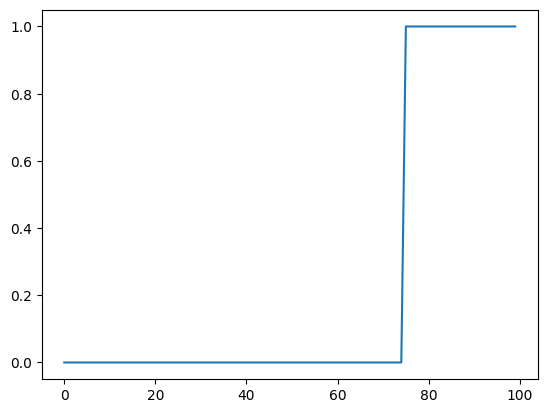

In [15]:
run(MAX_EPISODES = 100, isSlippery = False)